In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
#load the dataset 
communities_df = pd.read_csv('communities.csv')

#data cleaning: remove rows with missing values and handle categorical data
communities_df_clean = communities_df.dropna()
#suggest to use imputation

s


In [2]:
communities_df.shape

(1080, 226)

In [3]:
communities_df_clean.shape
communities_df_clean['Top country of birth'].value_counts()

Top country of birth
England          220
India             44
China             44
Italy             37
Vietnam           27
Greece             7
Croatia            6
Iraq               4
Sri Lanka          4
Turkey             2
Poland             1
Philippines        1
New Zealand        1
South Africa       1
Somalia            1
FYR Macedonia      1
Tonga              1
Malaysia           1
Name: count, dtype: int64

In [4]:
# search by keyword
communities_df_clean['Top country of birth'].value_counts().index

Index(['England', 'India', 'China', 'Italy', 'Vietnam', 'Greece', 'Croatia',
       'Iraq', 'Sri Lanka', 'Turkey', 'Poland', 'Philippines', 'New Zealand',
       'South Africa', 'Somalia', 'FYR Macedonia', 'Tonga', 'Malaysia'],
      dtype='object', name='Top country of birth')

In [5]:
# get top 10 countries by frequency
top_10_countries = communities_df_clean['Top country of birth'].value_counts().nlargest(10).index
# replace all countries to others, except top 10
communities_df_clean['Top country of birth'] = communities_df_clean['Top country of birth'].apply(lambda x: x if x in top_10_countries else 'Others')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15148\3059401682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  communities_df_clean['Top country of birth'] = communities_df_clean['Top country of birth'].apply(lambda x: x if x in top_10_countries else 'Others')


In [6]:
communities_df_clean['Top country of birth'].value_counts()

Top country of birth
England      220
China         44
India         44
Italy         37
Vietnam       27
Others         8
Greece         7
Croatia        6
Iraq           4
Sri Lanka      4
Turkey         2
Name: count, dtype: int64

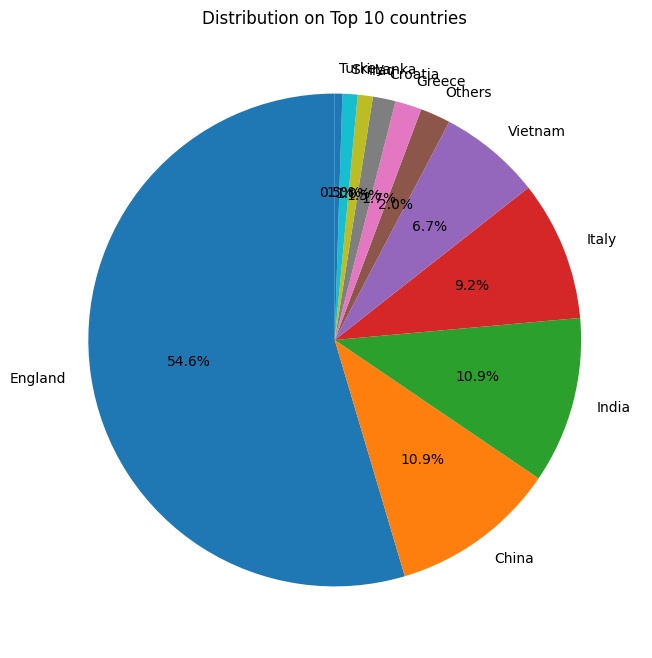

In [7]:
# count the occurences of each country
country_counts = communities_df_clean['Top country of birth'].value_counts()


#plot a pie chart for the top 10 countries+ 'Others'
plt.figure(figsize = (8,8))
plt.pie(country_counts, labels = country_counts.index, autopct= '%1.1f%%', startangle=90, colors=None, explode=None)
plt.title('Distribution on Top 10 countries')
plt.show()

#Plot a bar chart for the top 10 countries + 'Others'


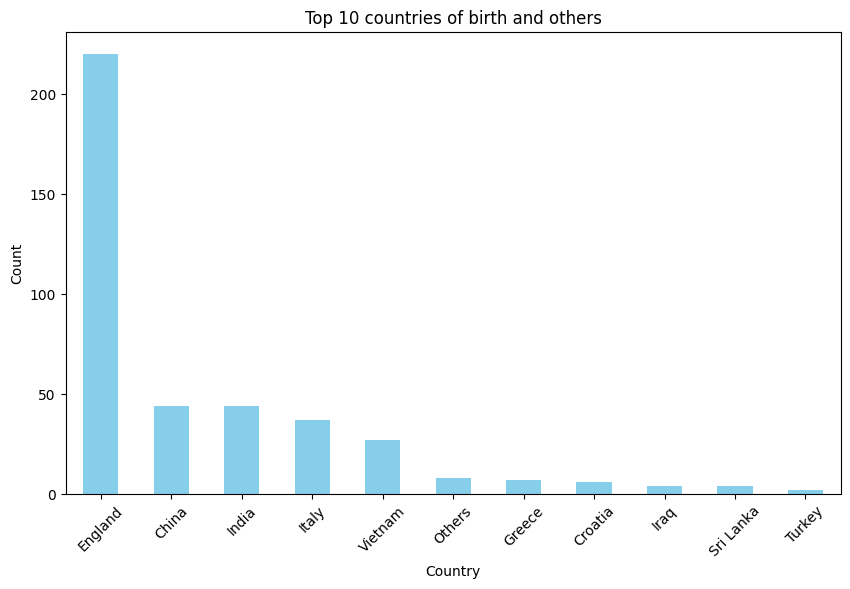

In [8]:
#Plot a bar chart for the top 10 countries + 'Others'
plt.figure(figsize = (10,6))
country_counts.plot(kind = 'bar', color = 'skyblue')

plt.title('Top 10 countries of birth and others')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [9]:
# do the prediction
#Select all features except'top country of birth' for prediction
X = communities_df_clean.drop(columns=['Top country of birth'])
#
